In [11]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D as Line
from matplotlib.patheffects import Stroke
import matplotlib.ticker as mticker
import numpy as np
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform
import pandas as pd
import sb_tools
import cmocean
import netCDF4 as nc



In [5]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# load topography

In [12]:
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [13]:
# Focus topo to interest region


lat_lim = [70, 80]
lon_lim = [5, 45]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1
bathy[bathy < 0] = 1 

C:\Users\mbd\anaconda3\envs\map-env\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
C:\Users\mbd\anaconda3\envs\map-env\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\mbd\anaconda3\envs\map-env\lib\site-packages\ipykernel_launcher.py:10: Deprecat

# Load data

In [14]:
SB_ADCP = pd.read_csv('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_ADCP_Position.csv', header=0, engine='python',names=['time','Lat','Long'])
SB_Iskant = pd.read_csv("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SB_Iskant_Position.csv", header=0, engine='python',names=['time','Lat','Long'])

In [15]:
SB_Iskant['time'] = pd.to_datetime(SB_Iskant.time)
SB_ADCP['time'] = pd.to_datetime(SB_ADCP.time)

# Map zoom

In [21]:
SB_ADCP_zoom = pd.read_excel("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SBADCP_PF.xlsx", header=0)
SB_Iskant_zoom = pd.read_excel("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/SBIskant_PF.xlsx", header=0)

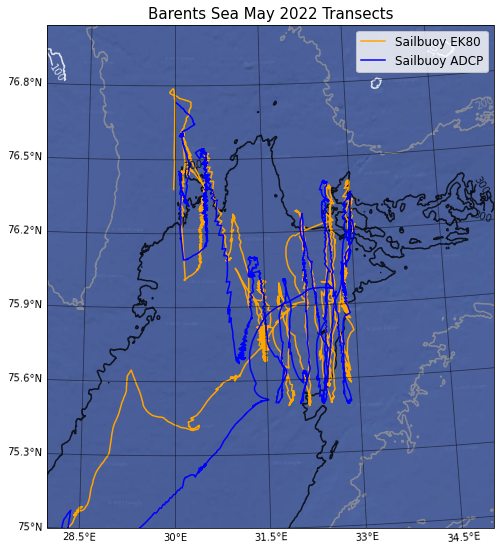

In [39]:
fig   = plt.figure(figsize=(8,14))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent_zoom=[28, 35, 75, 77]
ax.set_extent(extent_zoom, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.8, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects

plt.plot(SB_Iskant['Long'], SB_Iskant['Lat'], 'orange', transform=ccrs.PlateCarree(), label='Sailbuoy EK80')
plt.plot(SB_ADCP['Long'], SB_ADCP['Lat'], 'blue', transform=ccrs.PlateCarree(), label='Sailbuoy ADCP')

ax.set_title('Barents Sea May 2022 Transects', title_font)
plt.legend(fontsize=12)

#fig.savefig('PF_transects.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

# Make map

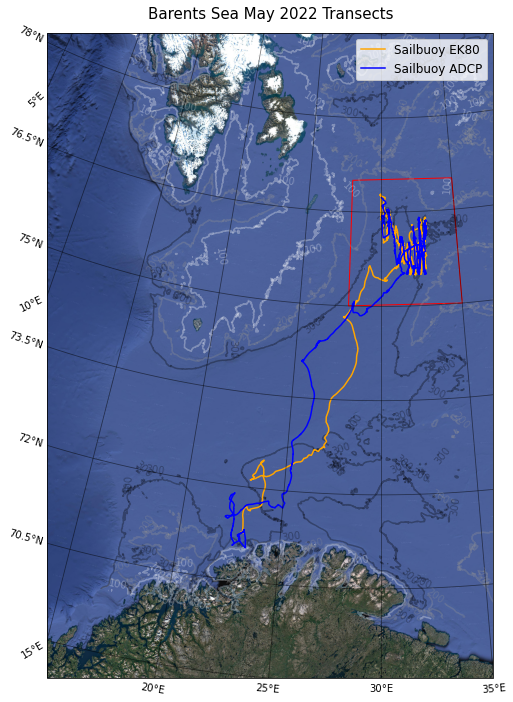

In [40]:
fig   = plt.figure(figsize=(8,14))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[15, 35, 69, 79]
ax.set_extent(extent, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.3, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects

plt.plot(SB_Iskant['Long'], SB_Iskant['Lat'], 'orange', transform=ccrs.PlateCarree(), label='Sailbuoy EK80')
plt.plot(SB_ADCP['Long'], SB_ADCP['Lat'], 'blue', transform=ccrs.PlateCarree(), label='Sailbuoy ADCP')


# zoom box
extent_box = sgeom.box(extent_zoom[0], extent_zoom[2], extent_zoom[1], extent_zoom[3])
ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                      edgecolor='red', linewidth=1)
ax.set_title('Barents Sea May 2022 Transects', title_font)
plt.legend(fontsize=12)

#fig.savefig('PF_transects.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')